In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# Estructura

## Figura

In [2]:
fig = plt.figure(figsize = (1 , 1))
plt.show()

<Figure size 100x100 with 0 Axes>

## Axes

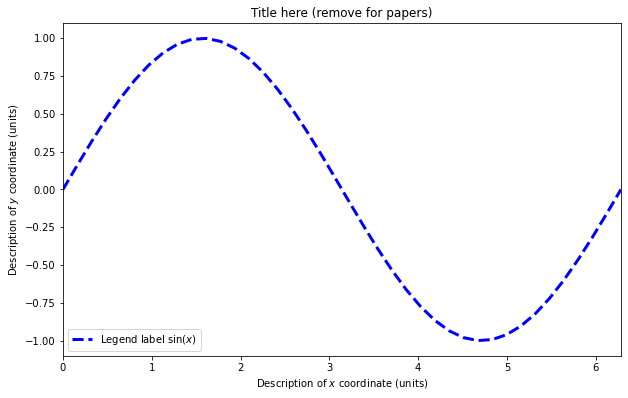

In [3]:
#silly example data

bp_x = np.linspace(0, 2*np.pi, num=40, endpoint=True) 
bp_y = np.sin(bp_x)

#Make the plot
fig = plt.figure(figsize=(10, 6), dpi=72)
plt.plot(bp_x, bp_y, linewidth=3, linestyle="--",
         color="blue", label=r"Legend label $\sin(x)$")
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Title here (remove for papers)")
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)
plt.legend(loc="lower left")
plt.show()

# Build a figure

In [4]:
x = list(range(10))
y = x

def generar_linea(eje_x, eje_y):
    
    fig = plt.figure(figsize=(4, 4), dpi=72)

    plt.plot(eje_x, eje_y, label='Línea azul')  # Etiqueta personalizada
    plt.title('Línea a 45 grados')
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')

    plt.legend()  # Ahora la leyenda dirá "Línea azul"
    plt.show()

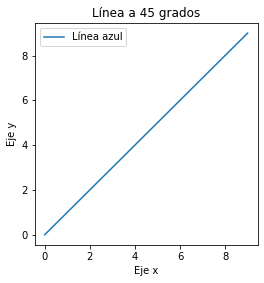

In [5]:
generar_linea(x, y)

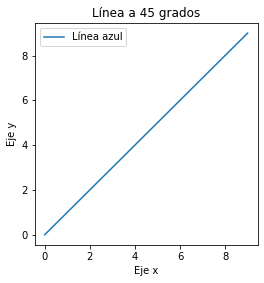

In [6]:
x = list(range(10))
y = x
fig = plt.figure(figsize=(4, 4), dpi=72)

plt.plot(x, y, label='Línea azul')  # Etiqueta personalizada
plt.title('Línea a 45 grados')
plt.xlabel('Eje x')
plt.ylabel('Eje y')

plt.legend()  # Ahora la leyenda dirá "Línea azul"

plt.savefig('figura.png', transparent= True) #Transparent true si quieres que la figura tenga background transparente

plt.show()

# Tipos de visualización

## Line plot

In [7]:
df = pd.read_csv('datos_falsos.csv', index_col=0)

In [8]:
df

first_name   last_name                      email       gender  \
id                                                                    
1         Hinda     Morican    hmorican0@blinklist.com     Bigender   
2        Marwin     McMakin  mmcmakin1@nydailynews.com         Male   
3         Orson     Endrici        oendrici2@slate.com         Male   
4       Sauncho    Loughman  sloughman3@soundcloud.com  Genderqueer   
5        Darsey     Thursby           dthursby4@w3.org         Male   
...         ...         ...                        ...          ...   
996       Roddy  Hutchinson      rhutchinsonrn@mapy.cz      Agender   
997     Opalina      Munsey         omunseyro@live.com  Genderqueer   
998    Richardo      Synnot     rsynnotrp@redcross.org  Genderqueer   
999      Fannie     Sinnott     fsinnottrq@plala.or.jp   Polygender   
1000    Mitchel    Illesley        millesleyrr@hhs.gov       Female   

           ip_address        date  salary  
id                                         
1      140.102.89.203  09/11/2021    1323  
2      102.95.205.140  26/08/2021    1395  
3     203.115.109.211  30/05/2021    1393  
4       243.214.38.13  20/03/2021    1472  
5     241.181.212.135  03/01/2021    1291  
...               ...         ...     ...  
996     121.91.147.21  15/04/2021    1212  
997    144.46.249.249  10/06/2021    1335  
998     53.79.142.104  30/11/2021    1489  
999    235.98.100.249  03/05/2021    1283  
1000   73.122.200.192  19/09/2021    1304  

[1000 rows x 7 columns]

In [9]:
df.info() #Podemos ver que la fecha no está en formato data

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  1000 non-null   object
 1   last_name   1000 non-null   object
 2   email       1000 non-null   object
 3   gender      1000 non-null   object
 4   ip_address  1000 non-null   object
 5   date        1000 non-null   object
 6   salary      1000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 62.5+ KB


In [10]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')  # Tipificamos los valores a fechas de pandas

df.sort_values(by='date', inplace=True)  # Ordenamos por fecha

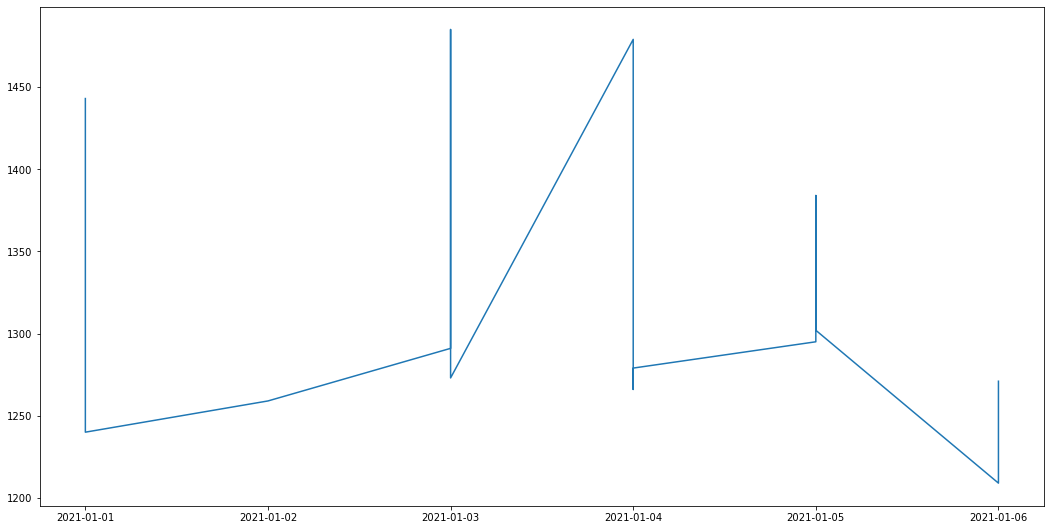

In [11]:
valores = 15 #Muestras a analizar

x = df['date'][0:valores]
y = df['salary'][0:valores]

fig = plt.figure(figsize=(18,9), dpi=72)

plt.plot(x , y)

plt.show()

In [12]:
# Asegurarse de que 'salary' es numérico
nuevo_df = df[['date', 'salary']]
nuevo_df['salary'] = pd.to_numeric(nuevo_df['salary'], errors='coerce')

# Definir 'date' como índice
nuevo_df = nuevo_df.set_index('date')

# Agrupar por el inicio de cada mes y calcular la media
datos = nuevo_df.groupby(pd.Grouper(freq='MS')).agg(['mean'])


C:\Users\Ander\AppData\Local\Temp\ipykernel_18752\3881621488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['salary'] = pd.to_numeric(nuevo_df['salary'], errors='coerce')


In [13]:
datos['salary2'] = datos.iloc[:,0]+50


In [14]:
datos

salary      salary2
                   mean             
date                                
2021-01-01  1338.229730  1388.229730
2021-02-01  1338.367647  1388.367647
2021-03-01  1356.867347  1406.867347
2021-04-01  1345.914634  1395.914634
2021-05-01  1345.814286  1395.814286
2021-06-01  1353.203883  1403.203883
2021-07-01  1355.300000  1405.300000
2021-08-01  1349.313433  1399.313433
2021-09-01  1362.688312  1412.688312
2021-10-01  1352.414634  1402.414634
2021-11-01  1345.814815  1395.814815
2021-12-01  1359.772727  1409.772727

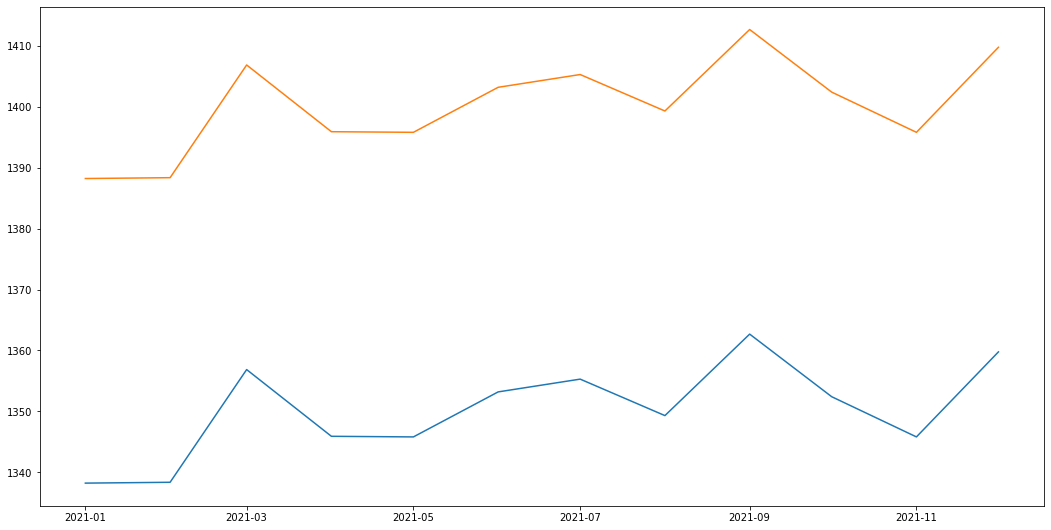

In [15]:
fig = plt.figure(figsize=(18,9), dpi=72)
plt.plot(datos)
plt.show()

## Bar plot

In [16]:
df.head()

first_name  last_name                 email       gender       ip_address  \
id                                                                              
337      Robin  Robillart     rrobillart9c@g.co      Agender      140.135.0.1   
311    Sauveur  MacGibbon  smacgibbon8m@nih.gov     Bigender     69.65.66.196   
828     Kennan      Geary    kgearymz@yandex.ru  Genderqueer   105.151.88.163   
889        Tim   Gunthorp   tgunthorpoo@loc.gov  Genderfluid    70.146.225.32   
5       Darsey    Thursby      dthursby4@w3.org         Male  241.181.212.135   

          date  salary  
id                      
337 2021-01-01    1443  
311 2021-01-01    1269  
828 2021-01-01    1240  
889 2021-01-02    1259  
5   2021-01-03    1291

In [17]:
df['gender'].unique()

array(['Agender', 'Bigender', 'Genderqueer', 'Genderfluid', 'Male',
       'Non-binary', 'Female', 'Polygender'], dtype=object)

In [18]:
df.value_counts('gender')

gender
Agender        137
Female         134
Polygender     130
Genderfluid    125
Male           123
Non-binary     123
Genderqueer    118
Bigender       110
Name: count, dtype: int64

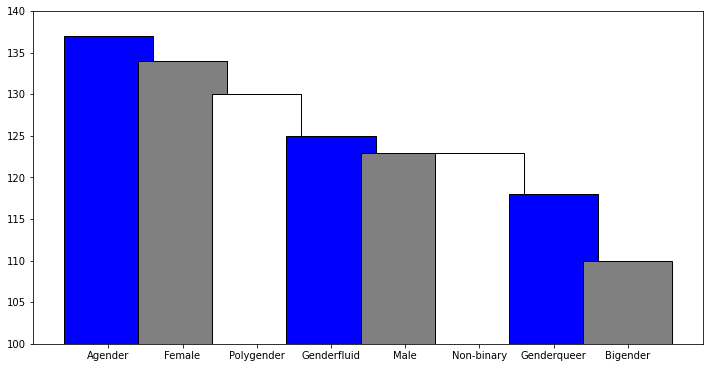

In [19]:
#Datos para gráfico

x = df.value_counts('gender').index

y = df.value_counts('gender')

fig = plt.figure(figsize = (12,6), dpi=72)

colour = ['blue', 'grey', 'white']

plt.bar(x, y,             #gráfico de barras
       width=1.2,         #Ancho de las barras
       edgecolor='black', #Perfil de las barras
       color = colour)    #color 

plt.ylim(100, 140) #Muestra solo entre 100 y 140 en el ejey y

plt.show()

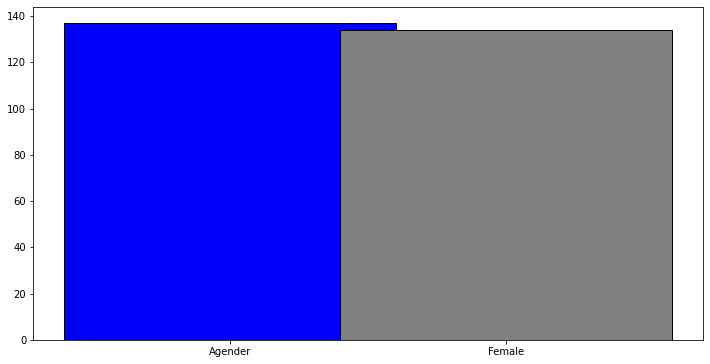

In [20]:
x = df.value_counts('gender').index[:2]

y = df.value_counts('gender')[:2]

fig = plt.figure(figsize = (12,6), dpi=72)

colour = ['blue', 'grey', 'white']

plt.bar(x, y,             #gráfico de barras
       width=1.2,         #Ancho de las barras
       edgecolor='black', #Perfil de las barras
       color = colour)    #color 

#plt.ylim(100, 140) #Muestra solo entre 100 y 140 en el ejey y

plt.show()

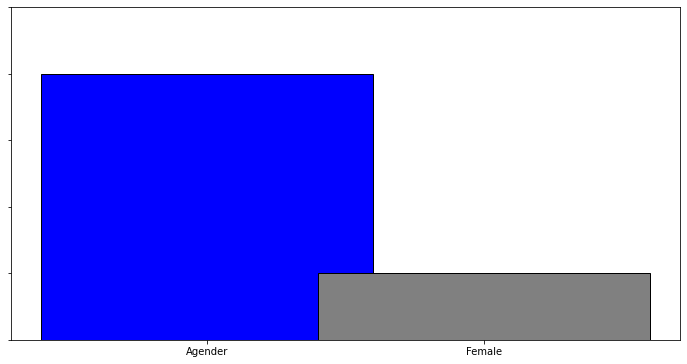

In [21]:
x = df.value_counts('gender').index[:2]

y = df.value_counts('gender')[:2]

fig = plt.figure(figsize = (12,6), dpi=72)

colour = ['blue', 'grey', 'white']

plt.bar(x, y,             #gráfico de barras
       width=1.2,         #Ancho de las barras
       edgecolor='black', #Perfil de las barras
       color = colour)    #color 

plt.ylim(133, 138) #Muestra solo entre 100 y 140 en el ejey y

plt.tick_params(labelleft=False) #Deshabilitar las divisiones de la derecha para acabar de manipular la gráfica

plt.show()

## Histogramas

In [22]:
from scipy.stats import skewnorm 


In [23]:
data = skewnorm.rvs(10, size = 1000) #1000 datos de distribución asimétrica

In [24]:
min(data)

-0.16870751927927388

In [25]:
data += 1 
print(min(data))
print(max(data))

0.8312924807207261
4.539860986620152


In [26]:
data *= 2000 #Creamos una distribución de salarios para que sean datos realistas

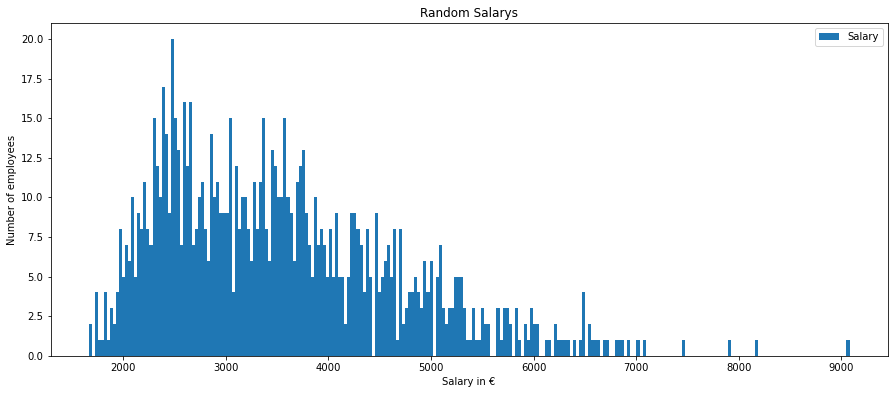

In [27]:
fig = plt.figure(figsize=(15,6),dpi=72)

plt.hist(data,
        label='Salary',
        bins = 250)#Cuantos compartimentos queremos que use
                #Dibujar histrograma (Como si fuera una distribución normal pero asimétrica)
plt.title('Random Salarys')
plt.xlabel('Salary in €')
plt.ylabel('Number of employees')
plt.legend() #Mostrar la label

plt.show()

## Scatter Plots

In [28]:
df = pd.read_csv('alturapeso.csv')

In [29]:
df

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]

In [30]:
df.columns = ['genero', 'altura', 'peso'] #Cambiamos el nombre de las columnas

In [31]:
metros = 0.0254 #relación pulgadas metros
kilos = 0.453592 #relación kg libras

In [33]:
df['altura'] *= metros #df['altura'] = df['altura'] * relación metros
df ['peso'] *= kilos

In [34]:
df.head(3)

genero    altura        peso
0   Male  1.875714  109.720985
1   Male  1.747060   73.622732
2   Male  1.882397   96.497550

In [35]:
df['genero'].unique() #Para ver cuantos hay

array(['Male', 'Female'], dtype=object)

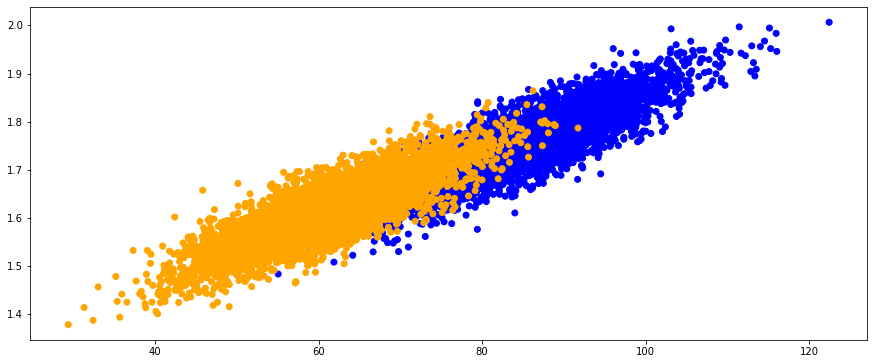

In [36]:
fig = plt.figure(figsize=(15,6), dpi=72)

x = df['peso'] #1a dimension
y = df['altura'] #2a dimensión

colors = {'Male':'Blue',
         'Female':'Orange'} #Diccionario para ligar genero a color



plt.scatter(x, y,
           c=df['genero'].map(colors), #Mapeamos el df, sustituye Male por Red y Female por Green, luego ya sabe como colorear
           ) 

plt.show()

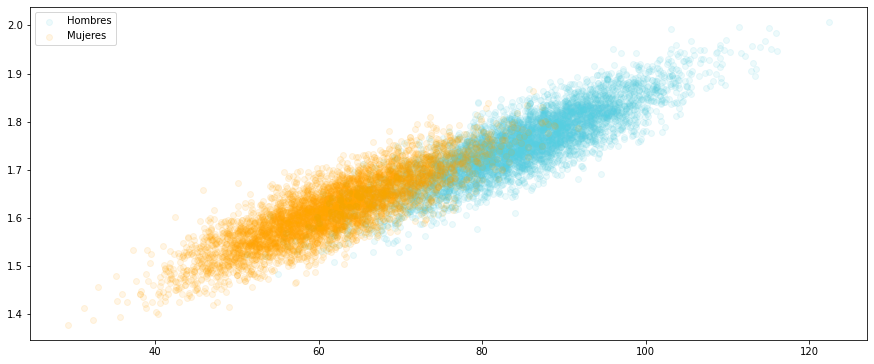

In [37]:
fig = plt.figure(figsize=(15,6), dpi=72)


#Generamos ejes diferentes para cada sexo
x_hombres = df[df['genero'] == 'Male']['peso']  
y_hombres = df[df['genero'] == 'Male']['altura']

x_mujeres = df[df['genero'] == 'Female']['peso']
y_mujeres = df[df['genero'] == 'Female']['altura']


plt.scatter(x_hombres, y_hombres,
            c='#57CEE0',
            label='Hombres',
            alpha = 0.1)
          
plt.scatter(x_mujeres, y_mujeres,
            c='Orange',
            label='Mujeres',
            alpha = 0.1) #transparencia, nos permite ver si coinciden puntos pero sigue sin ser muy visible
          

plt.legend()

plt.show()

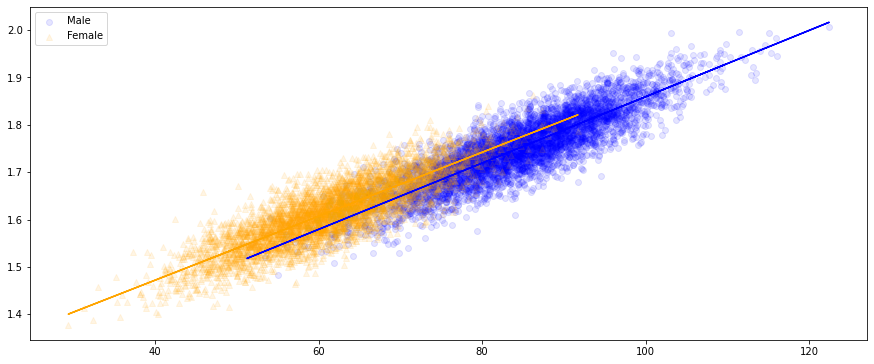

In [38]:
#IMAGINATE QUE TIENES 20 GENEROS, O OTRA COSA, CÓMO LO HACES?

fig = plt.figure(figsize=(15,6), dpi=72)

colors = {'Male':'Blue',
         'Female':'Orange'}

markers = {'Male': 'o',
           'Female': '^'}

for genero, color in colors.items(): #Necesario metodo items para iterar en diccionarios
    x = df[df['genero'] == genero]['peso']
    y = df[df['genero'] == genero]['altura']
    
    m, b = np.polyfit(x, y, 1) #El último valor es el grado del polinomio
    
    plt.scatter(x, y,
               c=color,
               alpha=0.1,
               marker=markers.get(genero),
               label=genero)
    
    plt.plot(x, m*x + b,
            c = color)

plt.legend()

plt.show()

In [39]:
correlation = df['altura'].corr(df['peso']) #Correlación entre altura y peso, 1 es máxima, 0 es nada, -1 es invertida.

In [40]:
correlation

0.9247562987409145

# Generar gráficas con Pandas

In [41]:
df.head()

genero    altura        peso
0   Male  1.875714  109.720985
1   Male  1.747060   73.622732
2   Male  1.882397   96.497550
3   Male  1.821967   99.809504
4   Male  1.774998   93.598619

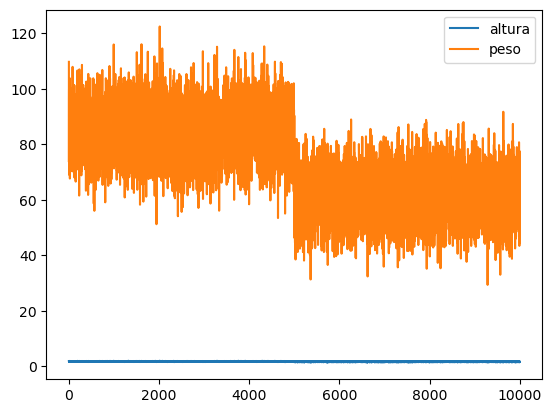

In [42]:
df.plot()

plt.show()

## Histograma

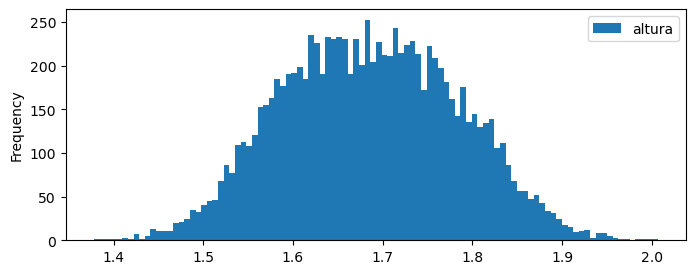

In [43]:
df.plot(kind='hist',
       y = 'altura',
       bins=100,
       figsize=(8,3))

plt.show()

## Boxplot

In [44]:
df['altura'] *= 100 #De metros a centímetros

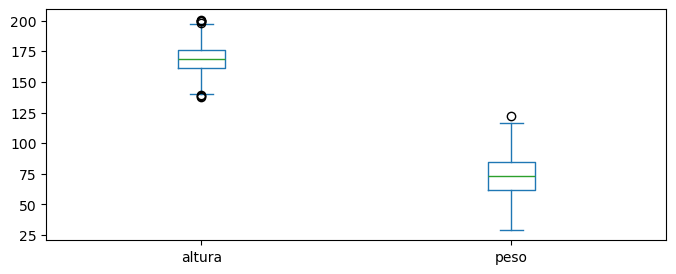

In [45]:
df.plot(kind='box',
       #y = 'altura',
       figsize=(8,3))

plt.show() 

Linea verde esla mediana (Valor de la mitad), la caja (rango intercualtil) representa el 50% de los datos. 3 desviaciones estandar cuentas la totalidad de los datos (Las lineas), los puntos que están fuera no se tienen en cuenta o se eliminan porque pueden afectar en exceso al dato del estudio, aisla los casos que son poco normales. (Outlayers)

## Scatterplot

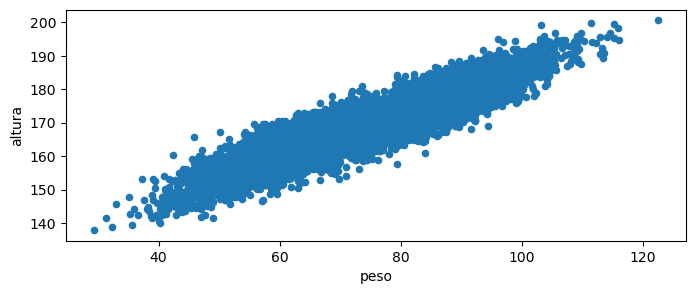

In [46]:
df.plot(kind='scatter',
        x='peso',
        y='altura',
        figsize=(8,3))

plt.show() 

## Seaborn

In [47]:
import seaborn as sns

In [48]:
sns.set_style('whitegrid',  #Cambia el estilo del fondo a oscuro y lo pone en cuadratula, hay más estilos
             )

### Line plot

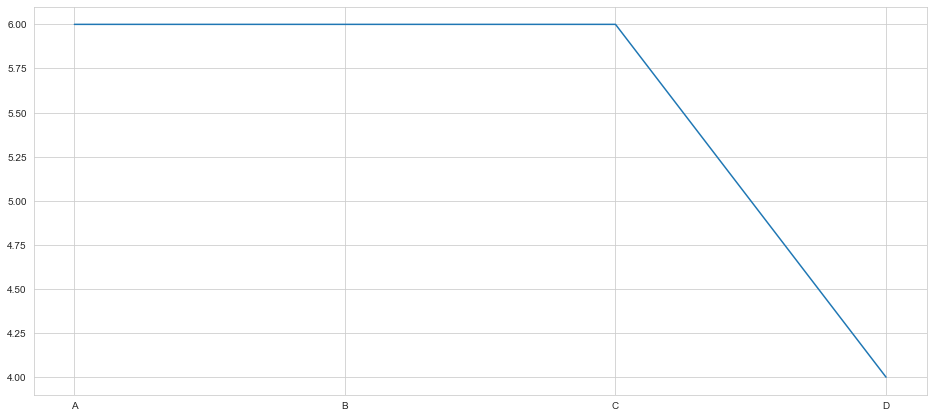

In [49]:
fig = plt.figure(figsize=(16,7), dpi=72)

letras =[i for i in 'ABCD'] #lista de abcd
numeros = [np.random.randint(1, 10) for i in letras]

g = sns.lineplot(x=letras, y=numeros) 

plt.show()

### Scatterplot

In [50]:
df.head(2)

genero      altura        peso
0   Male  187.571423  109.720985
1   Male  174.706036   73.622732

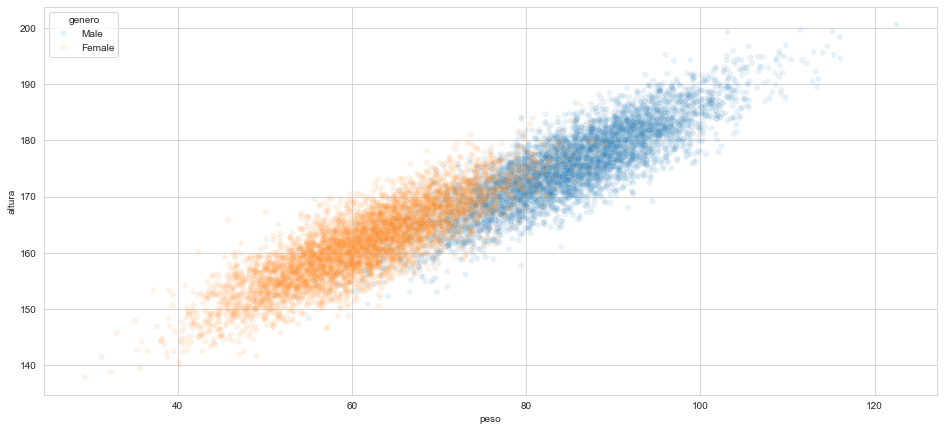

In [51]:
fig = plt.figure(figsize=(16,7), dpi=72)

g=sns.scatterplot(data=df,
                 x='peso',
                 y='altura',
                 hue='genero',
                 alpha=0.1)

plt.show()

### Catplot

In [52]:
df = pd.read_csv('datos_falsos.csv', index_col=0)

In [53]:
df.head(3)

first_name last_name                      email    gender       ip_address  \
id                                                                              
1       Hinda   Morican    hmorican0@blinklist.com  Bigender   140.102.89.203   
2      Marwin   McMakin  mmcmakin1@nydailynews.com      Male   102.95.205.140   
3       Orson   Endrici        oendrici2@slate.com      Male  203.115.109.211   

          date  salary  
id                      
1   09/11/2021    1323  
2   26/08/2021    1395  
3   30/05/2021    1393

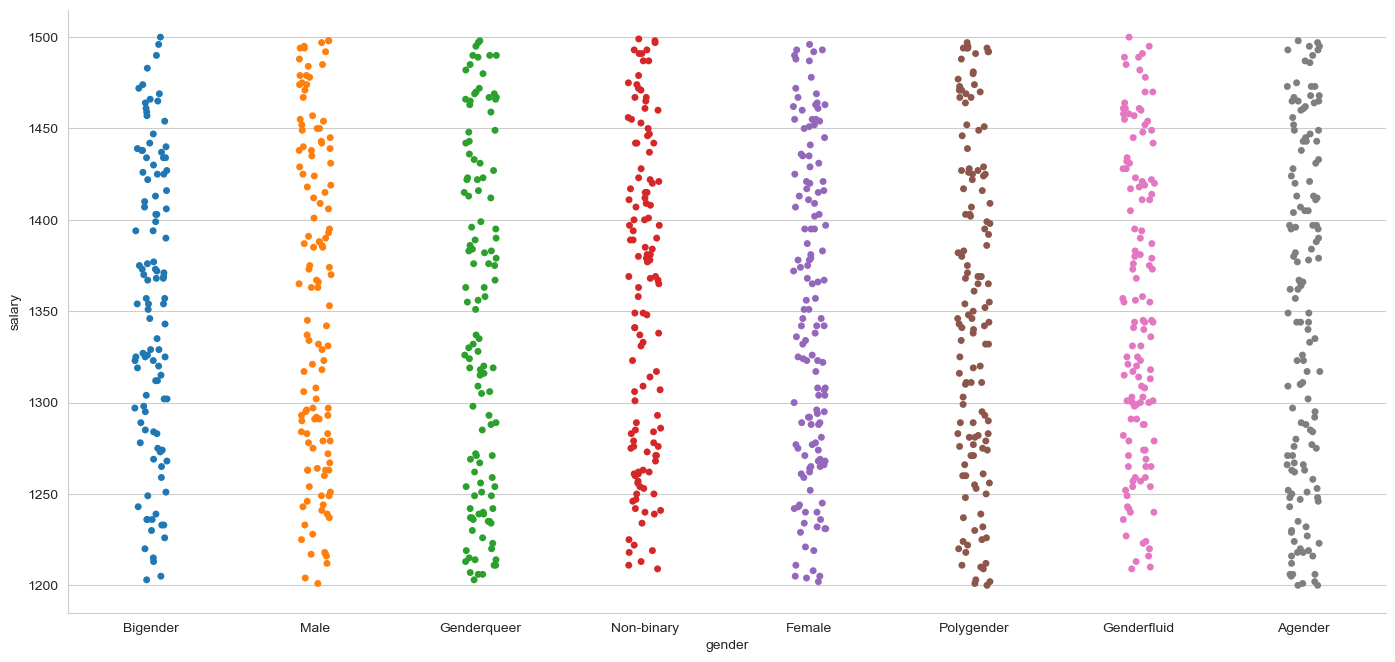

In [54]:
g = sns.catplot(data=df,
               x='gender',
               y='salary',
               hue='gender')

g.fig.set_size_inches(16,7)

### Swarm plot

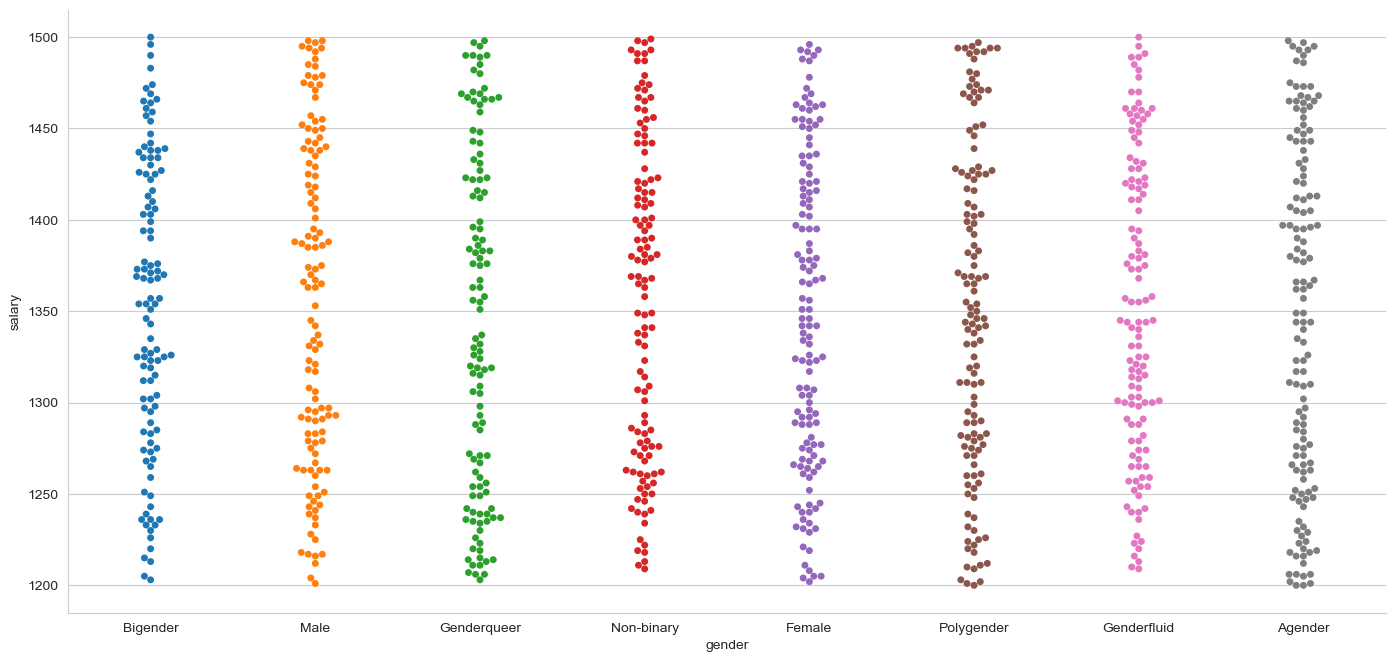

In [55]:
g = sns.catplot(data=df,
                kind='swarm',  #Agrupa en el eje vertical al centor para ver mejor donde hay varianzas o acumulaciones
               x='gender',
               y='salary',
               hue='gender')

g.fig.set_size_inches(16,7)

### BoxPlot

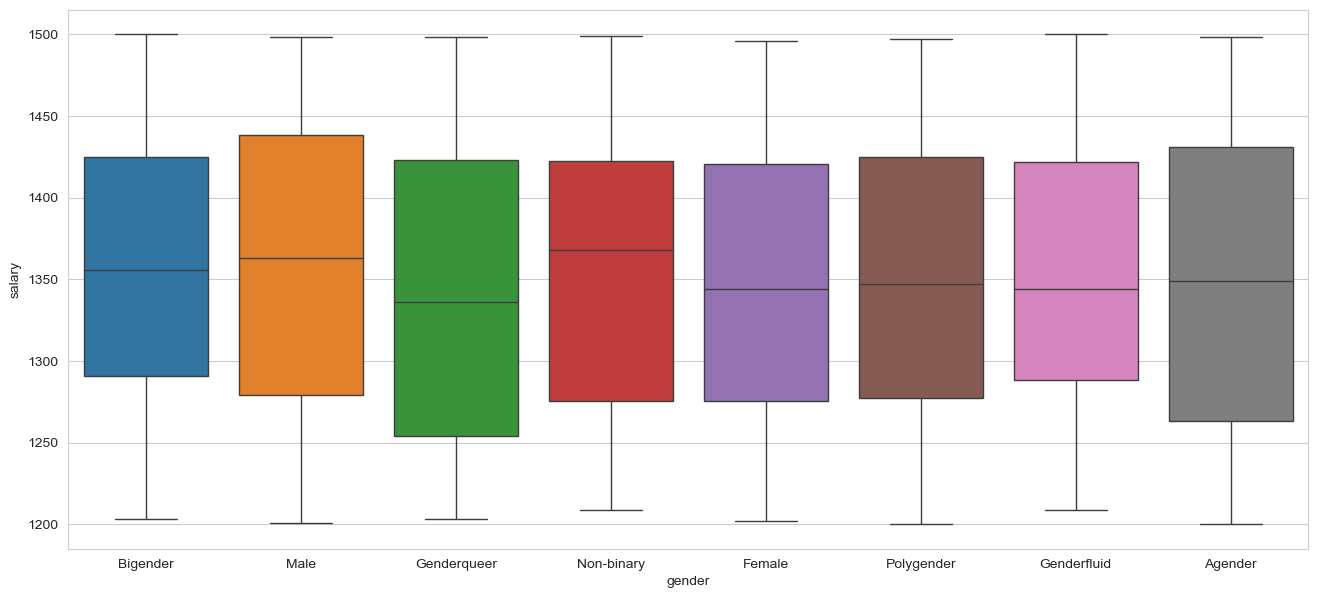

In [56]:
plt.figure(figsize=(16,7))  # Cambiar el tamaño de la figura

g = sns.boxplot(data=df,
               x='gender',
               y='salary',
               hue='gender')

plt.show()

### ViolinPlot

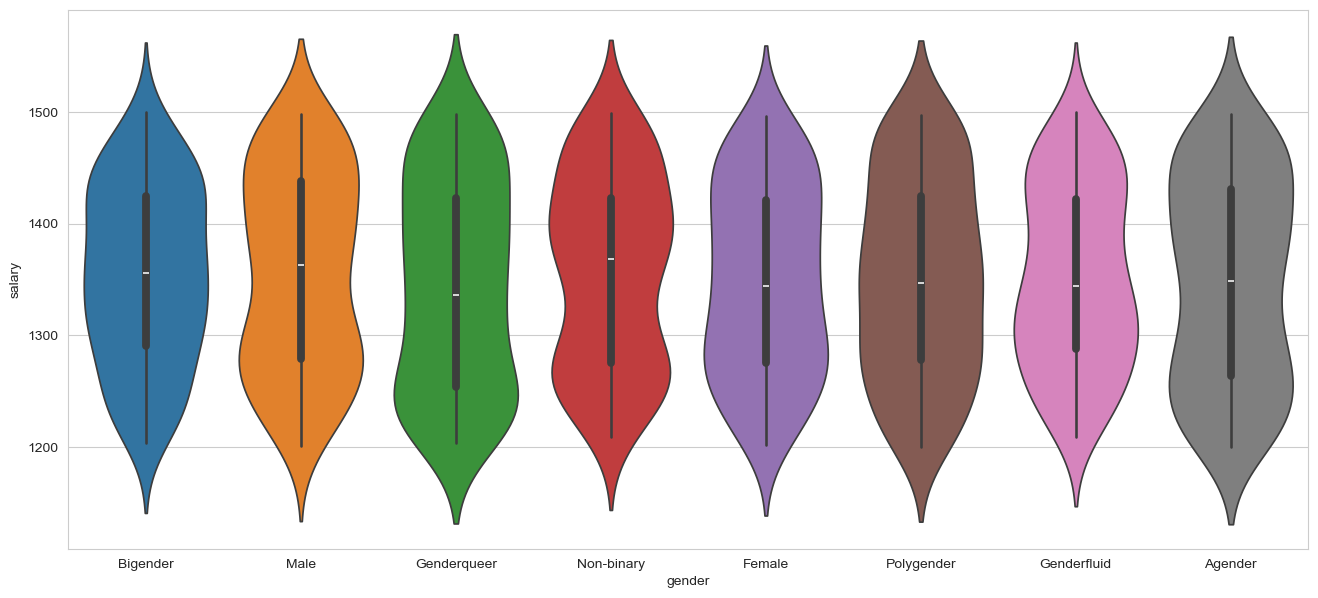

In [57]:
plt.figure(figsize=(16,7))  # Cambiar el tamaño de la figura

g = sns.violinplot(data=df,
               x='gender',
               y='salary',
               hue='gender')

plt.show()

### Boxen plot

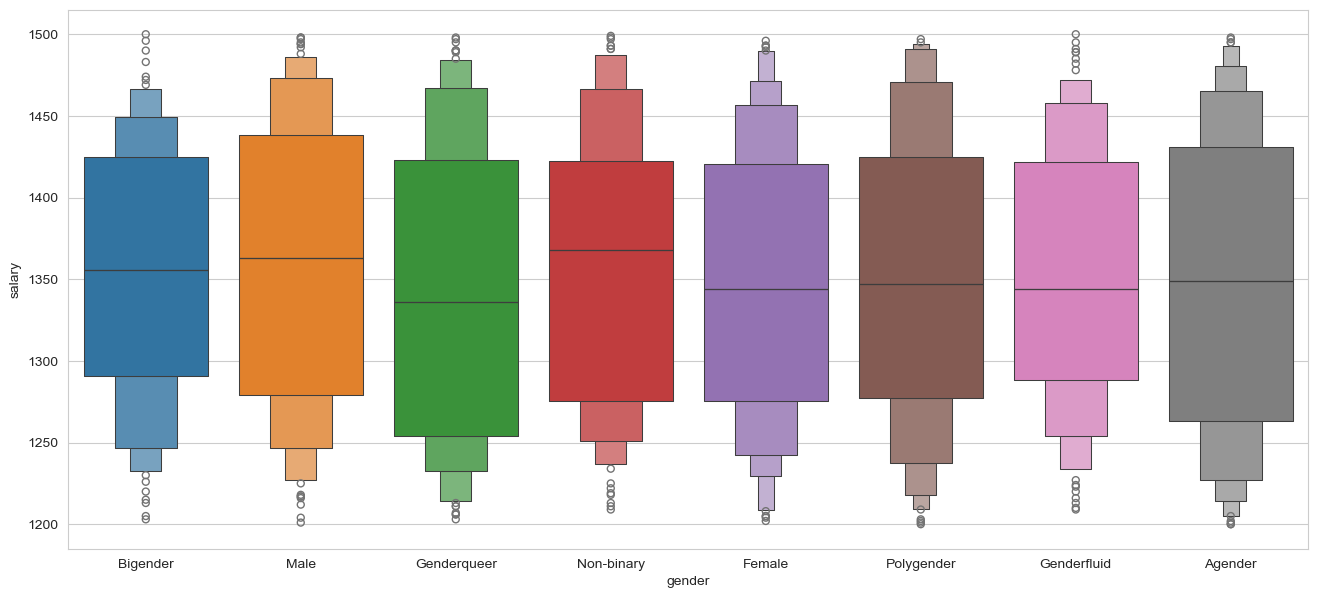

In [58]:
plt.figure(figsize=(16,7))  # Cambiar el tamaño de la figura

g = sns.boxenplot(data=df,
               x='gender',
               y='salary',
               hue='gender')

plt.show()

## Plotly

In [60]:
!pip install plotly  #! Para usar en cmd un comando

In [62]:
import plotly.express as px

In [88]:
import plotly.io as pio

In [64]:
pyo.init_notebook_mode() #Iniciar modo offline

### Scatterplot

In [65]:
df.head(1) #No es el df que nos interesa, vamos a recupera el de las alturas

first_name last_name                    email    gender      ip_address  \
id                                                                           
1       Hinda   Morican  hmorican0@blinklist.com  Bigender  140.102.89.203   

          date  salary  
id                      
1   09/11/2021    1323

In [70]:
df = pd.read_csv('alturapeso.csv')
df.columns = ['genero', 'altura', 'peso']
df['altura'] *= metros #df['altura'] = df['altura'] * relación metros
df ['peso'] *= kilos

In [89]:
pio.templates #Para ver los templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [96]:
fig = px.scatter(df, x = 'peso', y = 'altura',
                color = 'genero',
                #size = 'peso',
                opacity=0.2,
                trendline = 'ols')  #Línea de tendencia, hay diferentes formas de hacerlo.

fig.update_layout( title='Relacion de peso y altura entre hombres y mujeres',
                 font = dict(family = 'arial',
                            size = 14,
                            color = 'black'),
                 template = 'simple_white',
                 height = 400,
                 width = 900)
fig.update_yaxes( ticksuffix = ' m')
fig.update_xaxes( ticksuffix = ' kg')

fig.show()

### Japaneses candles with Plotly (Candle sticks)

In [98]:
!pip install yfinance

     ---------------------------------------- 0.0/939.5 kB ? eta -:--:--
     ------- ------------------------------ 194.6/939.5 kB 5.9 MB/s eta 0:00:01
     ------------------------------- ----- 809.0/939.5 kB 10.2 MB/s eta 0:00:01
     -------------------------------------- 939.5/939.5 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/101.0 kB ? eta -:--:--
   ---------------------------------------- 101.0/101.0 kB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-an

In [99]:
import yfinance as yf

In [113]:
df = yf.Ticker('BTC-USD').history(period='10Y')

In [101]:
df.head()

Open          High           Low  \
Date                                                                  
2023-10-23 00:00:00+00:00  30140.685547  34370.437500  30097.828125   
2023-10-24 00:00:00+00:00  33077.304688  35150.433594  32880.761719   
2023-10-25 00:00:00+00:00  33916.042969  35133.757812  33709.109375   
2023-10-26 00:00:00+00:00  34504.289062  34832.910156  33762.324219   
2023-10-27 00:00:00+00:00  34156.500000  34238.210938  33416.886719   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2023-10-23 00:00:00+00:00  33086.234375  38363572311        0.0           0.0  
2023-10-24 00:00:00+00:00  33901.527344  44934999645        0.0           0.0  
2023-10-25 00:00:00+00:00  34502.820312  25254318008        0.0           0.0  
2023-10-26 00:00:00+00:00  34156.648438  19427195376        0.0           0.0  
2023-10-27 00:00:00+00:00  33909.800781  16418032871        0.0           0.0

In [102]:
import plotly.graph_objs as go

In [114]:
fig = go.Figure(data = go.Ohlc( x = df.index,
                              open = df['Open'],
                              high = df['High'],
                              low = df['Low'],
                              close = df['Close']))

fig.update_yaxes(fixedrange = False,
                rangemode = 'nonnegative')

fig.show()

In [115]:
fig = go.Figure(data = go.Candlestick( x = df.index,
                              open = df['Open'],
                              high = df['High'],
                              low = df['Low'],
                              close = df['Close']))

fig.update_yaxes(fixedrange = False,
                rangemode = 'nonnegative')

fig.show()